## Transfer learning for retinal OCT disease diagnosis
### Image filtering
#### Alexander Hart, Jericho O'Connell, Devon Richtsmeier

This notebook takes the images in the test, train, and validation folders and creates a separate folder containing the
same images with a particular filter applied.

In addition, it will calculate the average mean squared error and the structual similiarity index measure between each
of the original images and the desired filter counterpart.

In the following cell, select the appropriate filter ('filt') and run. The code will iterate through all the original
images and apply the desired filter and then same in a new folder with the same sub-folder organization as the original.

In [ ]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import median_filter
from scipy.ndimage import gaussian_filter
from image_filter_funcs import lee_filter, conservative_filter

# The filter to apply to the images
filt = 'median'  # Options: median, lee, conservative, gaussian

# The directory in which to find the folder containing the appropriate images
directory = r'D:\OneDrive - University of Victoria\Files\Grad School\Classes\Machine Learning\final_project'
img_folder = 'OCT2017'  # The folder name containing the unfiltered images

folders = ['train', 'test', 'val']  # The training, testing, and validation folders within the img folder
sub_folders = ['CNV', 'DME', 'DRUSEN', 'NORMAL']  # The four image categories

# Iterate through all the files in each of the folders
for i, folder in enumerate(folders):
    for sub_folder in sub_folders:
        path = os.path.join(directory, img_folder, folder, sub_folder)
        save_path = os.path.join(directory, img_folder + f'_{filt}', folder, sub_folder)
        os.makedirs(save_path, exist_ok=True)

        # List all the files within 'path'
        files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
        files = np.array(files)

        # Iterate through all the images and apply the filter
        for file in files:
            loadfile = os.path.join(path, file)  # The image filepath to load
            savefile = os.path.join(save_path, file)  # The image filepath to save the filtered image

            # Open the image and set to a ndarray
            img = Image.open(os.path.join(path, file))
            img = np.array(img)

            # Apply the desired filter
            if filt == 'median':
                img = eval('median_filter(img, size=3)')
            elif filt == 'lee':
                img = eval('lee_filter(img, 3)')
            elif filt == 'gaussian':
                img = eval('gaussian_filter(img, sigma=2)')
            elif filt == 'conservative':
                img = eval('conservative_filter(img, 3)')

            img = Image.fromarray(np.uint8(img))
            img.save(savefile)


The following cell will take the filter ('filt') given and output the average MSE and SSIM of the 1000 images in the
training folder.

In [8]:
import os
import numpy as np
from PIL import Image
from mse import mse
from skimage.metrics import structural_similarity as ssim

# The filter to apply to the images
filt = 'median'  # Options: median, lee, conservative, gaussian

# The directory in which to find the folder containing the appropriate images
directory = r'D:\OneDrive - University of Victoria\Files\Grad School\Classes\Machine Learning\final_project'
img_folder = 'OCT2017'  # The folder name containing the unfiltered images

sub_folders = ['CNV', 'DME', 'DRUSEN', 'NORMAL']  # The four image categories

# Initialize the array to hold the mse and ssim scores for each image pair (original and filtered)
mse_scores = np.zeros(1000)
ssim_scores = np.zeros(1000)

# Interate through all of the 4 image category folders in the training folder
for sub_folder in sub_folders:

    path = os.path.join(directory, img_folder, 'train', sub_folder)
    filt_path = os.path.join(directory, img_folder + f'_{filt}', 'train', sub_folder)

    # List all the files within 'path'
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    files = np.array(files)

    for idx, file in enumerate(files):
        loadfile = os.path.join(path, file)  # The original unfiltered image filepath
        filtfile = os.path.join(filt_path, file)  # The filtered image filepath

        # Load the unfiltered image
        img = Image.open(loadfile)
        img = np.array(img)

        # Load the filtered image
        filtimg = Image.open(filtfile)
        filtimg = np.array(filtimg)

        # Calculate the MSE and SSIM for the image pair
        mse_scores[idx] = mse(img, filtimg)
        ssim_scores[idx] = ssim(img, filtimg)

# Take the average of the scores over all of the 1000 scores
mse_scores = np.mean(mse_scores)
ssim_scores = np.mean(ssim_scores)

print(f'Filter type: {filt}')
print(f'Mean MSE: {mse_scores}')
print(f'Mean SSIM: {ssim_scores}')

Filter type: median
Mean MSE: 18.068251723668904
Mean SSIM: 0.20119494300528726


The next cell will show a random OCT image unfiltered and with all of the other filters.

CNV-7907754-181.jpeg


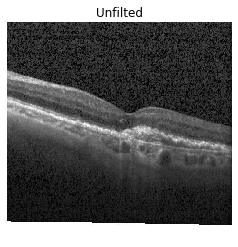

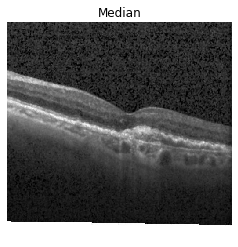

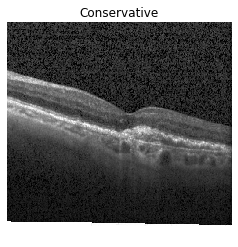

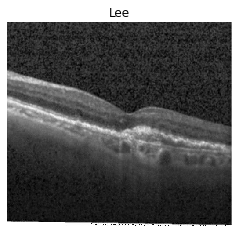

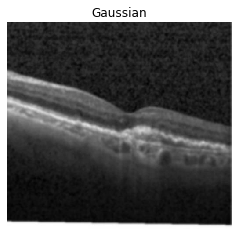

In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# The directory in which to find the folder containing the appropriate images
directory = r'D:\OneDrive - University of Victoria\Files\Grad School\Classes\Machine Learning\final_project'
img_folder = 'OCT2017'  # The folder name containing the unfiltered images

sub_folder = 'CNV'  # Options: 'CNV', 'DME', 'DRUSEN', 'NORMAL'

path = os.path.join(directory, img_folder, 'train', sub_folder)
med_path = os.path.join(directory, img_folder + '_median', 'train', sub_folder)
cons_path = os.path.join(directory, img_folder + '_conservative', 'train', sub_folder)
lee_path = os.path.join(directory, img_folder + '_lee', 'train', sub_folder)
gaus_path = os.path.join(directory, img_folder + '_gaussian', 'train', sub_folder)

# List all the files within 'path'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
files = np.array(files)
np.random.shuffle(files)  # Shuffle the file names
print(files[0])

# Append the file name to the paths
path = os.path.join(path, files[0])
med_path = os.path.join(med_path, files[0])
cons_path = os.path.join(cons_path, files[0])
lee_path = os.path.join(lee_path, files[0])
gaus_path = os.path.join(gaus_path, files[0])

# Load the images
img = Image.open(path)
med_img = Image.open(med_path)
cons_img = Image.open(cons_path)
lee_img = Image.open(lee_path)
gaus_img = Image.open(gaus_path)

fig0 = plt.figure()
plt.axis('off')
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title('Unfilted')
plt.show()

fig1 = plt.figure()
plt.axis('off')
plt.imshow(med_img, cmap='gray', interpolation='nearest')
plt.title('Median')
plt.show()

fig2 = plt.figure()
plt.axis('off')
plt.imshow(cons_img, cmap='gray', interpolation='nearest')
plt.title('Conservative')
plt.show()

fig3 = plt.figure()
plt.axis('off')
plt.imshow(lee_img, cmap='gray', interpolation='nearest')
plt.title('Lee')
plt.show()

fig4 = plt.figure()
plt.axis('off')
plt.imshow(gaus_img, cmap='gray', interpolation='nearest')
plt.title('Gaussian')
plt.show()